In [1]:
import pandas as pd
import numpy as np

### By using `read_csv(engine, encoding)`, solving the utf-8 error, and reading the file correctly. 
reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
air_2016 = pd.read_csv('Beijing_2016_HourlyPM25_created20170201.csv', skiprows=3, engine ='python', encoding = 'latin_1', parse_dates=[2])
air_2016.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2016-01-01 00:00:00,2016,1,1,0,231,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2016-01-01 01:00:00,2016,1,1,1,239,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2016-01-01 02:00:00,2016,1,1,2,205,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2016-01-01 03:00:00,2016,1,1,3,167,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2016-01-01 04:00:00,2016,1,1,4,132,µg/m³,1 Hr,Valid


In [3]:
air_2016.tail()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
8779,Beijing,PM2.5,2016-12-31 19:00:00,2016,12,31,19,409,µg/m³,1 Hr,Valid
8780,Beijing,PM2.5,2016-12-31 20:00:00,2016,12,31,20,432,µg/m³,1 Hr,Valid
8781,Beijing,PM2.5,2016-12-31 21:00:00,2016,12,31,21,482,µg/m³,1 Hr,Valid
8782,Beijing,PM2.5,2016-12-31 22:00:00,2016,12,31,22,488,µg/m³,1 Hr,Valid
8783,Beijing,PM2.5,2016-12-31 23:00:00,2016,12,31,23,507,µg/m³,1 Hr,Valid


In [4]:
air_2016.index

RangeIndex(start=0, stop=8784, step=1)

In [5]:
air_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Site        8784 non-null   object        
 1   Parameter   8784 non-null   object        
 2   Date (LST)  8784 non-null   datetime64[ns]
 3   Year        8784 non-null   int64         
 4   Month       8784 non-null   int64         
 5   Day         8784 non-null   int64         
 6   Hour        8784 non-null   int64         
 7   Value       8784 non-null   int64         
 8   Unit        8784 non-null   object        
 9   Duration    8784 non-null   object        
 10  QC Name     8784 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 755.0+ KB


In [6]:
air_2016.columns

Index(['Site', 'Parameter', 'Date (LST)', 'Year', 'Month', 'Day', 'Hour',
       'Value', 'Unit', 'Duration', 'QC Name'],
      dtype='object')

### Looking for the missing data. According to *the U.S. Department of State air quality files*, Missing values are listed as -999 but not null. In this case, we can't filter boolean by using 'dropna( )'.

In [8]:
air_2016_filtered = air_2016[air_2016['Value'] == -999]

In [146]:
air_2016_filtered

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
346,Beijing,PM2.5,2015-01-15 10:00:00,2015,1,15,10,-999,µg/m³,1 Hr,Missing
589,Beijing,PM2.5,2015-01-25 13:00:00,2015,1,25,13,-999,µg/m³,1 Hr,Missing
735,Beijing,PM2.5,2015-01-31 15:00:00,2015,1,31,15,-999,µg/m³,1 Hr,Missing
736,Beijing,PM2.5,2015-01-31 16:00:00,2015,1,31,16,-999,µg/m³,1 Hr,Missing
737,Beijing,PM2.5,2015-01-31 17:00:00,2015,1,31,17,-999,µg/m³,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...
8465,Beijing,PM2.5,2015-12-19 17:00:00,2015,12,19,17,-999,µg/m³,1 Hr,Missing
8466,Beijing,PM2.5,2015-12-19 18:00:00,2015,12,19,18,-999,µg/m³,1 Hr,Missing
8467,Beijing,PM2.5,2015-12-19 19:00:00,2015,12,19,19,-999,µg/m³,1 Hr,Missing
8468,Beijing,PM2.5,2015-12-19 20:00:00,2015,12,19,20,-999,µg/m³,1 Hr,Missing


### Data cleaning. By using `drop( )`, removing the rows with missing data.

In [9]:
air_2016 = air_2016.drop(air_2016.loc[air_2016['Value'] == -999].index)
air_2016

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2016-01-01 00:00:00,2016,1,1,0,231,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2016-01-01 01:00:00,2016,1,1,1,239,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2016-01-01 02:00:00,2016,1,1,2,205,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2016-01-01 03:00:00,2016,1,1,3,167,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2016-01-01 04:00:00,2016,1,1,4,132,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8779,Beijing,PM2.5,2016-12-31 19:00:00,2016,12,31,19,409,µg/m³,1 Hr,Valid
8780,Beijing,PM2.5,2016-12-31 20:00:00,2016,12,31,20,432,µg/m³,1 Hr,Valid
8781,Beijing,PM2.5,2016-12-31 21:00:00,2016,12,31,21,482,µg/m³,1 Hr,Valid
8782,Beijing,PM2.5,2016-12-31 22:00:00,2016,12,31,22,488,µg/m³,1 Hr,Valid


In [41]:
air_2016.Value.max()

782

In [42]:
air_2016.Value.mean()

72.72392918332382

In [43]:
air_2016.Value.median()

49.0

### To get the first sense of how air quality looks like in Beijing, 2015, from 00:00 Jan 1st to 23:59 Dec 31.

<AxesSubplot:>

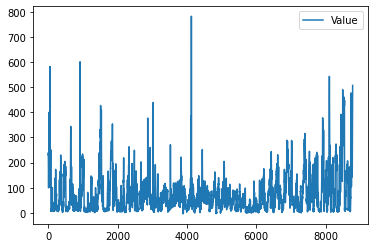

In [10]:
air_2016.plot(y='Value')

In [11]:
midnight=air_2016[air_2016['Hour'] == 0]

In [12]:
midnight

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2016-01-01,2016,1,1,0,231,µg/m³,1 Hr,Valid
24,Beijing,PM2.5,2016-01-02,2016,1,2,0,362,µg/m³,1 Hr,Valid
48,Beijing,PM2.5,2016-01-03,2016,1,3,0,530,µg/m³,1 Hr,Valid
72,Beijing,PM2.5,2016-01-04,2016,1,4,0,251,µg/m³,1 Hr,Valid
96,Beijing,PM2.5,2016-01-05,2016,1,5,0,9,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8664,Beijing,PM2.5,2016-12-27,2016,12,27,0,20,µg/m³,1 Hr,Valid
8688,Beijing,PM2.5,2016-12-28,2016,12,28,0,144,µg/m³,1 Hr,Valid
8712,Beijing,PM2.5,2016-12-29,2016,12,29,0,5,µg/m³,1 Hr,Valid
8736,Beijing,PM2.5,2016-12-30,2016,12,30,0,477,µg/m³,1 Hr,Valid


In [13]:
midday = air_2016[air_2016['Hour'] == 12]
midday

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
12,Beijing,PM2.5,2016-01-01 12:00:00,2016,1,1,12,135,µg/m³,1 Hr,Valid
36,Beijing,PM2.5,2016-01-02 12:00:00,2016,1,2,12,222,µg/m³,1 Hr,Valid
60,Beijing,PM2.5,2016-01-03 12:00:00,2016,1,3,12,103,µg/m³,1 Hr,Valid
84,Beijing,PM2.5,2016-01-04 12:00:00,2016,1,4,12,15,µg/m³,1 Hr,Valid
108,Beijing,PM2.5,2016-01-05 12:00:00,2016,1,5,12,14,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8676,Beijing,PM2.5,2016-12-27 12:00:00,2016,12,27,12,17,µg/m³,1 Hr,Valid
8700,Beijing,PM2.5,2016-12-28 12:00:00,2016,12,28,12,11,µg/m³,1 Hr,Valid
8724,Beijing,PM2.5,2016-12-29 12:00:00,2016,12,29,12,33,µg/m³,1 Hr,Valid
8748,Beijing,PM2.5,2016-12-30 12:00:00,2016,12,30,12,109,µg/m³,1 Hr,Valid


### I have a hypothesis, due to the actitivities during the daytime, air quality in the day is  worse than it in the night.

<AxesSubplot:>

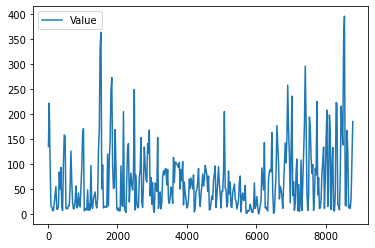

In [14]:
midday.plot(y='Value')

<AxesSubplot:>

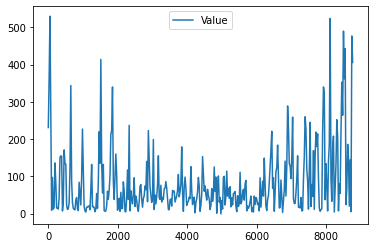

In [15]:
midnight.plot(y='Value')

Text(0, 0.5, 'PM 2.5')

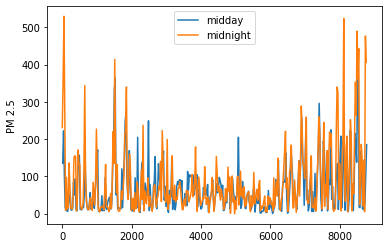

In [20]:
ax = midday.plot(y="Value", label="midday")
midnight.plot(y="Value",label="midnight",ax=ax)
ax.set_ylabel("PM 2.5")

### I assume the air quality on Chinese new year eve is more likely worse than new year eve, due to the cultural bond.

In [21]:
new_year_eve = air_2016[((air_2016['Month']==12) & (air_2016['Day']==31))]
new_year_eve.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
8760,Beijing,PM2.5,2016-12-31 00:00:00,2016,12,31,0,406,µg/m³,1 Hr,Valid
8761,Beijing,PM2.5,2016-12-31 01:00:00,2016,12,31,1,426,µg/m³,1 Hr,Valid
8762,Beijing,PM2.5,2016-12-31 02:00:00,2016,12,31,2,409,µg/m³,1 Hr,Valid
8763,Beijing,PM2.5,2016-12-31 03:00:00,2016,12,31,3,412,µg/m³,1 Hr,Valid
8764,Beijing,PM2.5,2016-12-31 04:00:00,2016,12,31,4,406,µg/m³,1 Hr,Valid


In [22]:
new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,24.0,24.0,24.0,24.000000,24.000000
mean,2016.0,12.0,31.0,11.500000,350.083333
std,0.0,0.0,0.0,7.071068,117.671583
min,2016.0,12.0,31.0,0.000000,143.000000
25%,2016.0,12.0,31.0,5.750000,223.500000
50%,2016.0,12.0,31.0,11.500000,406.000000
75%,2016.0,12.0,31.0,17.250000,434.750000
max,2016.0,12.0,31.0,23.000000,507.000000


<AxesSubplot:xlabel='Hour'>

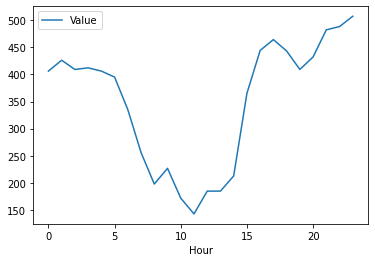

In [23]:
new_year_eve.plot(x='Hour', y='Value')

### Chinese new year is Feb 7

In [25]:
chinese_new_year_eve = air_2016[((air_2016['Month']==2) & (air_2016['Day']==7))]
chinese_new_year_eve.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
888,Beijing,PM2.5,2016-02-07 00:00:00,2016,2,7,0,84,µg/m³,1 Hr,Valid
889,Beijing,PM2.5,2016-02-07 01:00:00,2016,2,7,1,88,µg/m³,1 Hr,Valid
890,Beijing,PM2.5,2016-02-07 02:00:00,2016,2,7,2,93,µg/m³,1 Hr,Valid
891,Beijing,PM2.5,2016-02-07 03:00:00,2016,2,7,3,75,µg/m³,1 Hr,Valid
892,Beijing,PM2.5,2016-02-07 04:00:00,2016,2,7,4,57,µg/m³,1 Hr,Valid


In [26]:
chinese_new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,24.0,24.0,24.0,24.000000,24.000000
mean,2016.0,2.0,7.0,11.500000,49.541667
std,0.0,0.0,0.0,7.071068,35.061411
min,2016.0,2.0,7.0,0.000000,13.000000
25%,2016.0,2.0,7.0,5.750000,20.000000
50%,2016.0,2.0,7.0,11.500000,34.500000
75%,2016.0,2.0,7.0,17.250000,72.750000
max,2016.0,2.0,7.0,23.000000,151.000000


<AxesSubplot:xlabel='Hour'>

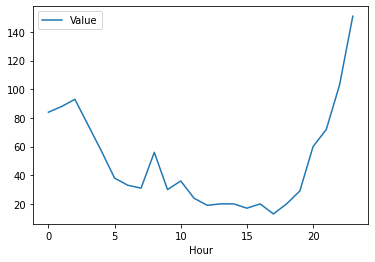

In [27]:
chinese_new_year_eve.plot(x ='Hour', y='Value')

Text(0, 0.5, 'PM 2.5')

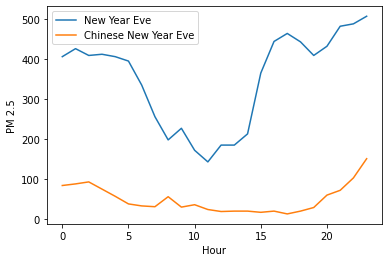

In [28]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
ax.set_ylabel("PM 2.5")

*Next step:* Compare the two different new year's eves with an average day (calculated hour by hour).

### To compare to normal days, I need to find the average index of every hour.

In [29]:
hourly_average = air_2016[['Hour','Value']].groupby(['Hour']).mean().reset_index()
hourly_average

,Hour,Value
0,0,82.123626
1,1,85.636612
2,2,81.383562
3,3,75.527322
4,4,73.423497
5,5,71.868852
6,6,69.920548
7,7,68.136612
8,8,64.841096
9,9,64.705234


Text(0, 0.5, 'PM 2.5')

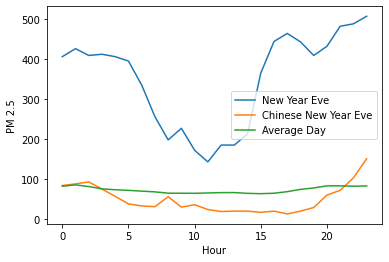

In [30]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
hourly_average.plot(x='Hour',y='Value',label="Average Day", ax=ax)
ax.set_ylabel("PM 2.5")

### I also want to know in which month/months, Beijingers have better air.

In [31]:
month_average = air_2016[['Month','Value']].groupby(['Month']).mean().reset_index()
month_average

,Month,Value
0,1,72.146703
1,2,43.959538
2,3,93.125168
3,4,66.500000
4,5,55.245614
5,6,58.668994
6,7,59.161725
7,8,38.673854
8,9,51.595833
9,10,82.092266


In [32]:
list(month_average['Month'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

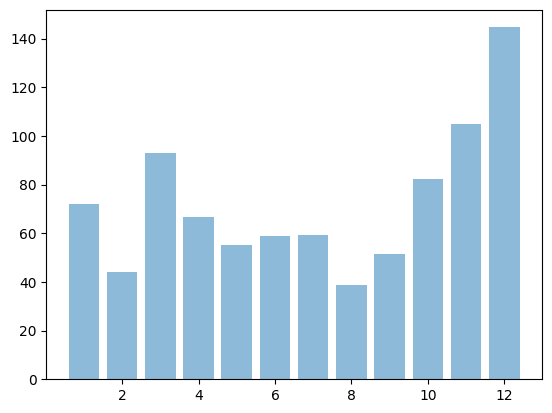

In [34]:
plt.bar(list(month_average['Month']), list(month_average['Value']), align='center',alpha=0.5)

In [35]:
from datetime import date
month_names = [date(2015,m,1).strftime('%b') for m in list(month_average['Month'])]
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

<BarContainer object of 12 artists>

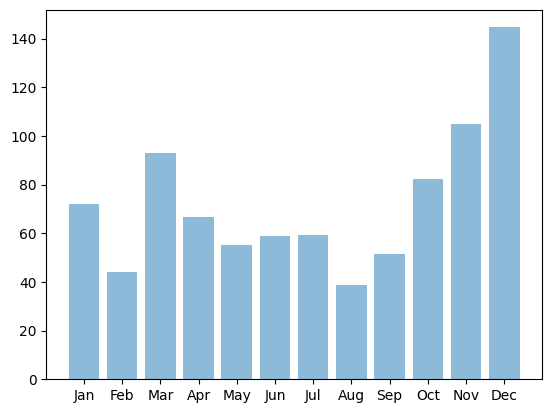

In [36]:
plt.bar(month_names, list(month_average['Value']), align='center',alpha=0.5)